# Cartopy

## Documentation 

* <https://scitools.org.uk/cartopy/docs/latest/>

## Données 

* on peut récupérer des cartes au format shapefile par pays sur <http://www.gadm.org>
* `shsreader.Reader("carte.shp").geometries()` permet de lire les données 
* `add_geometries()` pour tracer les données

## Lignes de côtes

La base c'est :

* une projection : voir <https://scitools.org.uk/cartopy/docs/latest/crs/projections.html#cartopy-projections>
* on peut prendre `ccrs.PlateCarree()`
* ajout des lignes de cotes avec `ax.coastlines()` (`ax` est un *axes* Matplotlib)

In [72]:
import numpy as np
import pandas as pd
import cartopy.crs as ccrs
import cartopy.io.shapereader as shpreader
import matplotlib.patches as mpatches
import matplotlib.pyplot as plt

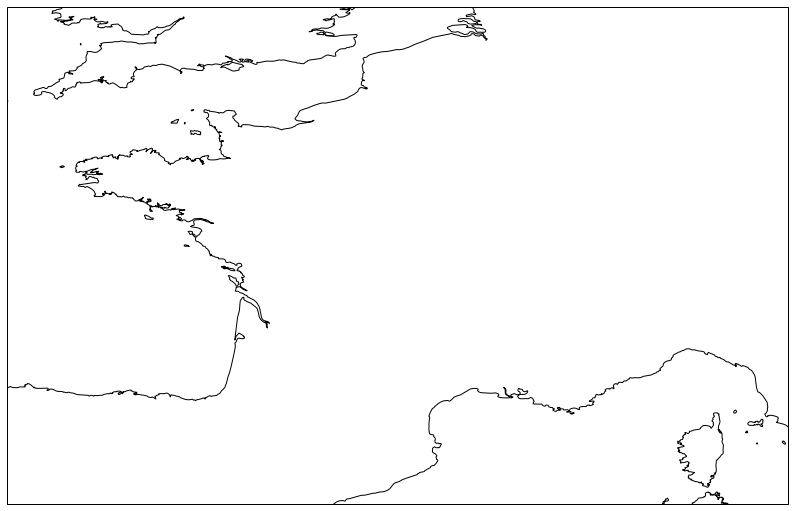

In [73]:
# initialise le plot
fig, ax = plt.subplots(figsize = (14, 16))
# on choisit la projection
ax = plt.axes(projection=ccrs.PlateCarree())
# permet de zoomer sur la région souhaitée
ax.set_extent([-6.3, 11, 41, 52], ccrs.PlateCarree())

# on ajoute les lignes des côtes, avec la résolution voulue (110, 50 ou 10)
ax.coastlines(resolution='10m');

## Carte de France

* en utilisant un shapefile et `ax.add_geometries()`
* `zorder=-1` pour mettre en arrière plan
* `facecolor` : couleur intérieur
* `edgecolor` : couleur des frontières

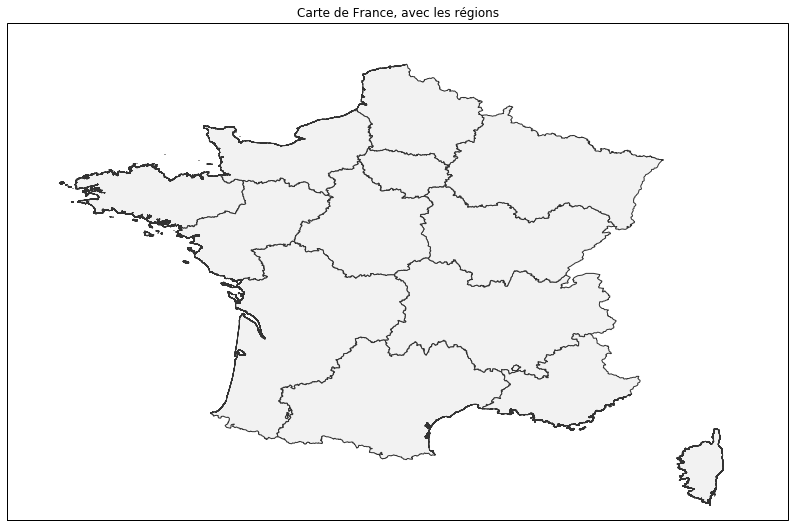

In [74]:
# Cartes de France récupérées sur http://www.gadm.org/country
# le FRA_0 : juste la France
# le FRA_1 : avec les régions
# le FRA_2 : avec les départements
france_dep = list(shpreader.Reader("./data_carte/gadm36_FRA_1.shp").geometries())

# initialise le plot
fig, ax = plt.subplots(figsize = (14, 16))
# on choisit la projection
ax = plt.axes(projection=ccrs.PlateCarree())
# permet de zoomer sur la région souhaitée
ax.set_extent([-6.3, 11, 41, 52], ccrs.PlateCarree())

# le titre
ax.set_title("Carte de France, avec les régions")
# on ajoute la carte de France 
# zorder=-1 pour mettre en arrière plan
# facecolor : couleur intérieur
# edgecolor : couleur des frontières
ax.add_geometries(france_dep, ccrs.PlateCarree(),
                  edgecolor="#333333", facecolor="#f2f2f2", zorder=-1);

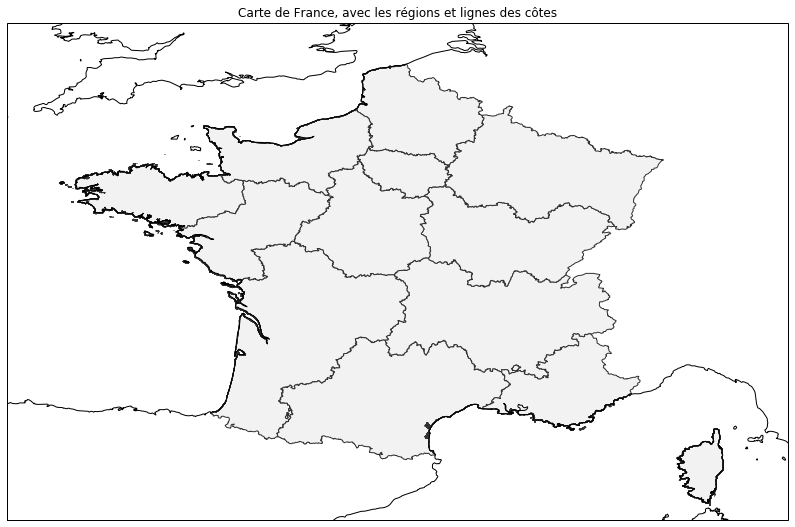

In [75]:
# Même chose mais avec la ligne des côtes en plus

# initialise le plot
fig, ax = plt.subplots(figsize = (14, 16))
# on choisit la projection
ax = plt.axes(projection=ccrs.PlateCarree())
# permet de zoomer sur la région souhaitée
ax.set_extent([-6.3, 11, 41, 52], ccrs.PlateCarree())

# le titre
ax.set_title("Carte de France, avec les régions et lignes des côtes")

# on ajoute les lignes des côtes, avec la résolution voulue (110, 50 ou 10)
ax.coastlines(resolution='10m')
# on ajoute la carte de France 
ax.add_geometries(france_dep, ccrs.PlateCarree(),
                  edgecolor="#333333", facecolor="#f2f2f2", zorder=-1);

## Ajout de points

* `ax.scatter()` pour tracer les points
* `ax.annotate()` pour les labels

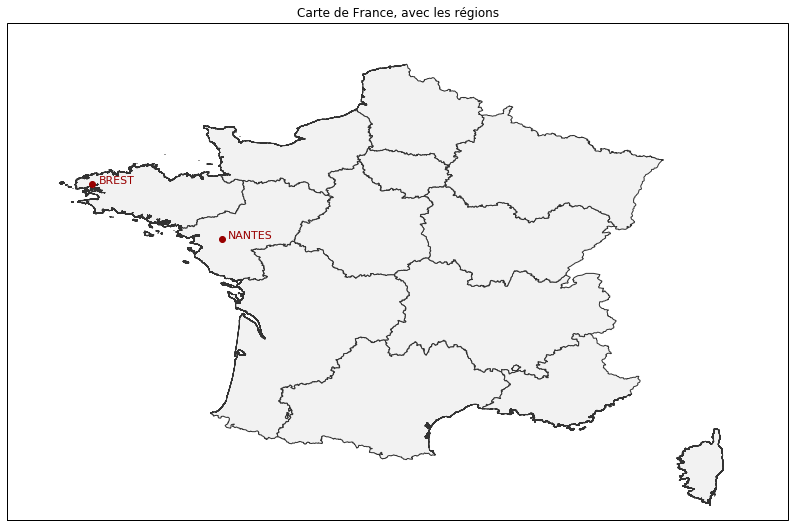

In [76]:
villes = pd.DataFrame({
    "Nom": ["Brest",
             "Nantes"],
    "Latitude": [48.444167, 47.218371],
    "Longitude": [-4.412000, -1.553621]
})

# initialise le plot
fig, ax = plt.subplots(figsize = (14, 16))
# on choisit la projection
ax = plt.axes(projection=ccrs.PlateCarree())
# permet de zoomer sur la région souhaitée
ax.set_extent([-6.3, 11, 41, 52], ccrs.PlateCarree())

# le titre
ax.set_title("Carte de France, avec les régions")

# on ajoute la carte de France 
ax.add_geometries(france_dep, ccrs.PlateCarree(),
                  edgecolor="#333333", facecolor="#f2f2f2", zorder=-1)

# on ajoute les villes sur la carte
ax.scatter(x="Longitude", y="Latitude", data=villes, color='#990000', marker='o')
# ajout du nom des villes
# text() ne sait écrire qu'un seul label à la fois
# le + 0.15 pour décaler un poil le label
for i, txt in enumerate(villes["Nom"]):
    ax.annotate(xy=(villes["Longitude"][i] + 0.15, villes["Latitude"][i]), s=txt.upper(), 
                size = 11, color = "#990000")

## Architecture d'un shapefile

* <https://scitools.org.uk/cartopy/docs/v0.15/tutorials/using_the_shapereader.html>
* 2 méthodes de la classe `Reader` : 
    + `geometries()` : itérateur sur les géometries, pour tracer les limites des géométries
    + `records()` : itérateur sur les observations du shapefile
* la classe `Record` contient elle 3 attributs :
    + `attributes` : dictionnaire contenant une liste d'attributs de l'observation
    + `bounds` : les limites de la `geometry()` de l'observation
    + `geometry` : l'instance `shapely.eometry` de l'observation

In [77]:
# carte de France niveau région
france_shp = shpreader.Reader("./data_carte/gadm36_FRA_1.shp")

# renvoie un itétrateur sur les régions
france_regions = france_shp.records()
# la première region
region = next(france_regions)

print(region.attributes)
# les clés
print(region.attributes.keys())
print(region.bounds)

{'GID_0': 'FRA', 'NAME_0': 'France', 'GID_1': 'FRA.1_1', 'NAME_1': 'Auvergne-Rhône-Alpes', 'VARNAME_1': '', 'NL_NAME_1': '', 'TYPE_1': 'Région', 'ENGTYPE_1': 'Region', 'CC_1': '', 'HASC_1': 'FR.AR'}
dict_keys(['GID_0', 'NAME_0', 'GID_1', 'NAME_1', 'VARNAME_1', 'NL_NAME_1', 'TYPE_1', 'ENGTYPE_1', 'CC_1', 'HASC_1'])
(2.06291437, 44.11571884, 7.18512011, 46.80387497)


In [78]:
# Pour récupérer les noms de toutes les régions
noms_regions = []
for r in france_shp.records():
    noms_regions.append(r.attributes["NAME_1"])

print(noms_regions)

['Auvergne-Rhône-Alpes', 'Bourgogne-Franche-Comté', 'Bretagne', 'Centre-Val de Loire', 'Corse', 'Grand Est', 'Hauts-de-France', 'Île-de-France', 'Normandie', 'Nouvelle-Aquitaine', 'Occitanie', 'Pays de la Loire', "Provence-Alpes-Côte d'Azur"]


## Choropleth

<https://ipython-books.github.io/146-manipulating-geospatial-data-with-cartopy/>

In [79]:
# quelques contrats pour Bretagne et Pays de la Loire
nb_contrats = pd.DataFrame({
    "Nom": ["Bretagne",
            "Pays de la Loire"],
    "nb_cnt": [10, 30]
})

# pour les autrers régions, c'est 0
nb_contrats = pd.merge(pd.DataFrame({"Nom" : noms_regions}), 
                        nb_contrats, 
                        how="left", on="Nom").fillna(0)

nb_contrats

,Nom,nb_cnt
0,Auvergne-Rhône-Alpes,0.0
1,Bourgogne-Franche-Comté,0.0
2,Bretagne,10.0
3,Centre-Val de Loire,0.0
4,Corse,0.0
5,Grand Est,0.0
6,Hauts-de-France,0.0
7,Île-de-France,0.0
8,Normandie,0.0
9,Nouvelle-Aquitaine,0.0


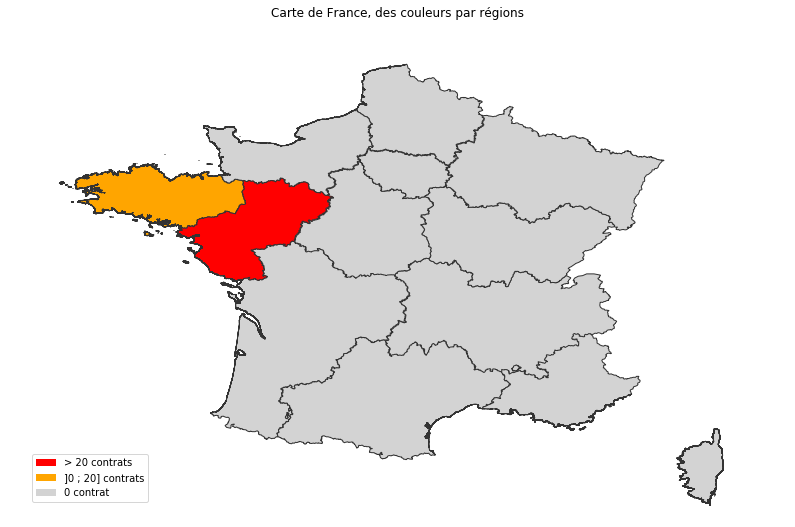

In [80]:
# initialise le plot
fig, ax = plt.subplots(figsize = (14, 16))
# on choisit la projection
ax = plt.axes(projection=ccrs.PlateCarree())
# pour enlever le cadre du plot
ax.outline_patch.set_visible(False)
# permet de zoomer sur la région souhaitée
ax.set_extent([-6.3, 11, 41, 52], ccrs.PlateCarree())

# le titre
ax.set_title("Carte de France, des couleurs par régions")

# on ajoute chaque région une par une, en adaptant la couleur de fond
for r in france_shp.records():
    # si 0 contrat, c'est gris
    if r.attributes["NAME_1"] in nb_contrats[nb_contrats["nb_cnt"] == 0]["Nom"].values:
        facecolor = "lightgray"
    # si ]0 ; 20] c'est orange
    elif r.attributes["NAME_1"] in nb_contrats[(nb_contrats["nb_cnt"] > 0) & (nb_contrats["nb_cnt"] <= 20)]["Nom"].values:
        facecolor = "orange"
    # si > 20 c'est rouge
    else:
        facecolor = "red"
    ax.add_geometries(r.geometry, ccrs.PlateCarree(), edgecolor="#333333", 
                          facecolor=facecolor)
    
# Pour la légende
red_square = mpatches.Rectangle((0, 0), 1, 1, facecolor="red")
orange_square = mpatches.Rectangle((0, 0), 1, 1, facecolor="orange")
gray_square = mpatches.Rectangle((0, 0), 1, 1, facecolor="lightgray")
labels = ["> 20 contrats",
          "]0 ; 20] contrats",
          "0 contrat"]
# bbox_to_anchor pour décaler un peu du bord
ax.legend([red_square, orange_square, gray_square], labels,
            loc='lower left', bbox_to_anchor=(0.025, 0.025), fancybox=True); 